# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # loss : 손실 함수, log : 로지스틱 손실 함수, max_iter : 최대 에포크 횟수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [8]:
sc.partial_fit(train_scaled, train_target) # 에포크를 1회 수행

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [9]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [10]:
for _ in range(0, 300): # _는 이후에 사용하지 않을 변수
    sc.partial_fit(train_scaled, train_target, classes=classes) # fit를 사용하지 않고 partial_fit만 사용할 때는 전체 클래스의 레이블을 전달해야 함
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

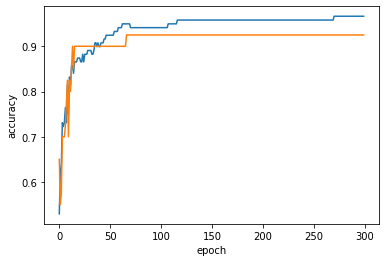

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100 이상에서 훈련 세트의 정확도가 테스트 세트의 정확도보다 급격히 높아지는 것으로 보아 과대적합되고 있으므로 100에서 조기종료 하는 것이 적절함

In [12]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol은 전달된 변수만큼의 변화가 없을 때 더 훈련하지 않고 자동으로 멈추게 함
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [13]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # SCDClassifier의 기본 loss 함수는 hinge로, SVM을 위한 손실 함수임
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
